# Data visualisation lab 4
## Made by: Paulius Lapienis

In [10]:
from labs.definitions import DATA_DIR
import pandas as pd

DATA_PATH = DATA_DIR / "anime_filtered.csv"
df = pd.read_csv(DATA_PATH)
df

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14469,26089,Gutchonpa Omoshiro Hanashi,NaN,グッチョンパおもしろ話,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Unknown,5,Finished Airing,...,NaN,Fall 1987,Unknown,"{'Other': [{'mal_id': 26087, 'type': 'anime', ...",NaN,NaN,NaN,Kids,[],[]
14470,21525,Geba Geba Shou Time!,NaN,ゲバゲバ笑タイム!,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,1,Finished Airing,...,NaN,NaN,NaN,[],Studio Lotus,NaN,NaN,Comedy,[],[]
14471,37897,Godzilla: Hoshi wo Kuu Mono,NaN,GODZILLA -星を喰う者-,"Godzilla Part 3, Godzilla: Eater of Stars",https://myanimelist.cdn-dena.com/images/anime/...,Movie,Other,1,Not yet aired,...,NaN,NaN,NaN,"{'Prequel': [{'mal_id': 36816, 'type': 'anime'...",NaN,NaN,NaN,"Action, Sci-Fi, Adventure, Fantasy",[],[]
14472,34193,Nippon Mukashibanashi: Sannen Netarou,NaN,日本昔ばなし 三ねん寝太郎,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Other,1,Finished Airing,...,NaN,NaN,NaN,[],NaN,NaN,NaN,"Fantasy, Kids",[],[]


In [11]:
df.columns

Index(['anime_id', 'title', 'title_english', 'title_japanese',
       'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status',
       'airing', 'aired_string', 'aired', 'duration', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites', 'background',
       'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio',
       'genre', 'opening_theme', 'ending_theme'],
      dtype='object')

In [12]:
df.describe()

,anime_id,episodes,score,scored_by,rank,popularity,members,favorites
count,14474.000000,14474.000000,14474.000000,1.447400e+04,12901.000000,14474.000000,1.447400e+04,14474.000000
mean,17371.948183,11.310971,6.144179,1.146319e+04,6439.625068,7220.277256,2.297275e+04,311.735595
std,13163.266015,43.449161,1.460617,4.311072e+04,3719.462602,4168.959000,7.499075e+04,2615.910510
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
25%,4387.500000,1.000000,5.550000,4.600000e+01,3218.000000,3613.250000,2.450000e+02,0.000000
50%,15128.000000,1.000000,6.370000,5.010000e+02,6442.000000,7225.500000,1.682500e+03,2.000000
75%,31142.000000,12.000000,7.060000,3.947250e+03,9664.000000,10826.750000,1.038050e+04,23.000000
max,37916.000000,1818.000000,10.000000,1.009477e+06,12919.000000,14487.000000,1.456378e+06,106895.000000


First step to calculating distances is choosing the correct features and normalizing them.

In [13]:
import numpy as np
from sklearn import preprocessing
from function_pipes import pipe
from functools import partial

data = pipe(
    df.select_dtypes(include=np.number).drop(columns=["anime_id", "rank"]),
    preprocessing.MinMaxScaler().fit_transform,
    partial(
        pd.DataFrame,
        columns=df.select_dtypes(include=np.number)
        .drop(columns=["anime_id", "rank"])
        .columns,
    ),
)
data


,episodes,score,scored_by,popularity,members,favorites
0,0.006601,0.763,1.379427e-01,0.015945,0.194923,0.026278
1,0.014301,0.789,9.034976e-02,0.025264,0.140076,0.024126
2,0.028053,0.755,3.678043e-02,0.080969,0.048152,0.007503
3,0.020902,0.821,3.615833e-02,0.063229,0.064071,0.031283
4,0.013751,0.867,1.067553e-01,0.029406,0.125493,0.019477
...,...,...,...,...,...,...
14469,0.002750,0.550,5.943672e-06,0.938635,0.000052,0.000000
14470,0.000550,0.460,4.953060e-06,0.916960,0.000062,0.000000
14471,0.000550,0.000,0.000000e+00,0.498792,0.001195,0.000000
14472,0.000550,0.600,9.906120e-07,0.989439,0.000022,0.000000


For easier visualizations we will only use 3 features [popularity, members, favorites] when grouping and calculating distances.

In [14]:
data = data[['popularity', 'members', 'favorites']]
data

,popularity,members,favorites
0,0.015945,0.194923,0.026278
1,0.025264,0.140076,0.024126
2,0.080969,0.048152,0.007503
3,0.063229,0.064071,0.031283
4,0.029406,0.125493,0.019477
...,...,...,...
14469,0.938635,0.000052,0.000000
14470,0.916960,0.000062,0.000000
14471,0.498792,0.001195,0.000000
14472,0.989439,0.000022,0.000000


Then we calculate a distance matrix using the chosen distance functions: 
- Manhattan
- Euclidean
- Cosine
- SMC
- Jaccard

Now having distance matrices a clustering [algorithm](https://scikit-learn.org/stable/modules/clustering.html) should be chosen. For this task I chose DBSCAN as it best fit the data at hand with a specific HDBSCAN [implementation](https://github.com/scikit-learn-contrib/hdbscan). This is due to [compute requirements](https://hdbscan.readthedocs.io/en/latest/performance_and_scalability.html) and the size of the dataset.

In [7]:
from functools import partial
from scipy.spatial.distance import pdist, squareform
from function_pipes import pipe
from collections import ChainMap
from hdbscan import HDBSCAN

distance_methods = ["cityblock", "euclidean", "matching", "cosine", "jaccard"]

distace_matricies = pipe(
    distance_methods,
    lambda function_names: [
        {function_name: pipe(pdist(data.values, function_name), squareform, np.nan_to_num, HDBSCAN(metric='precomputed').fit_predict)}
        for function_name in function_names
    ],
    lambda l: dict(ChainMap(*l)),
    pd.DataFrame,
)
distace_matricies


,jaccard,cosine,matching,euclidean,cityblock
0,35,-1,8,-1,-1
1,35,-1,8,-1,-1
2,35,-1,8,-1,-1
3,35,-1,8,-1,-1
4,35,-1,8,-1,-1
...,...,...,...,...,...
14469,36,-1,8,440,438
14470,36,-1,8,307,463
14471,-1,-1,8,295,312
14472,36,124,8,167,180


Now we can visualize the clusters for each distance function and compare them.

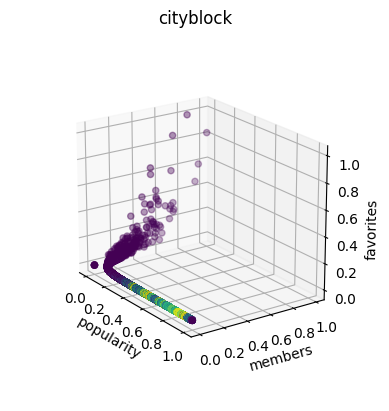

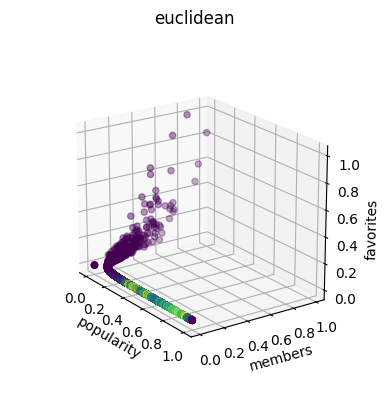

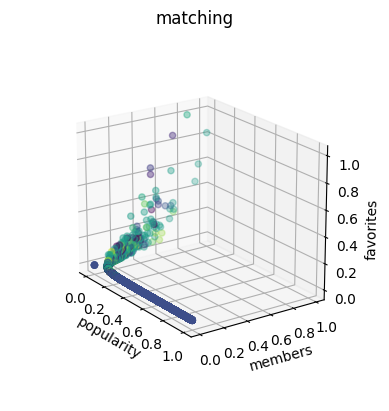

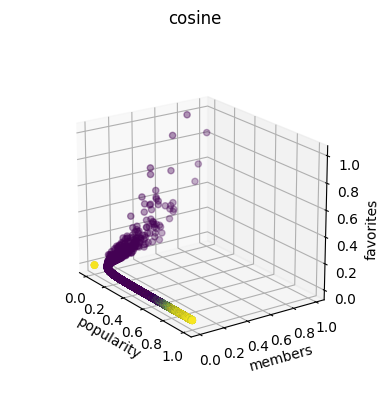

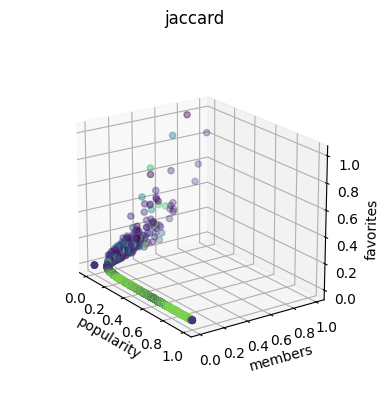

In [86]:
from matplotlib import legend
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


df = data.join(distace_matricies)
for method in distance_methods:
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(df['popularity'], df['members'], df['favorites'], c=df[method], cmap='viridis')
    ax.set_xlabel('popularity')
    ax.set_ylabel('members')
    ax.set_zlabel('favorites')
    ax.view_init(elev=20., azim=-35, roll=0)
    ax.set_box_aspect((5, 4, 4), zoom=0.8)
    ax.title.set_text(method)
    plt.show()
    